# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy pandas matplotlib seaborn -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the csv file using pandas read_csv method and store in data
data=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/foodhub_order.csv')

In [4]:
# Write your code here to view the first 5 rows
data.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [24]:
# Write your code here
# using shape method it will result total number of rows and columns which is 1898 rows and 9 columns
data.shape

(1898, 9)

#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [23]:
# Write your code here
# using info function and clearly shows there are about 5 numerical columns and 4 categorical ones
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [25]:
# Write your code here
# There are no missing values in the data set as we can see from info function above
data.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [26]:
# Write your code here
# using describe function to get the statistical summary and transposing it for easier understanding
data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [27]:
# Write the code here
# There are two ways - #1 is the sum of all such not given ratings whereas #2 is count of unique values- True here is 'Not given'
Total_count=(data['rating']=='Not given').sum()
print(Total_count)
Total_count_notrated=(data['rating']=='Not given').value_counts()
print(Total_count_notrated)


736
rating
False    1162
True      736
Name: count, dtype: int64


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

1200
178
14


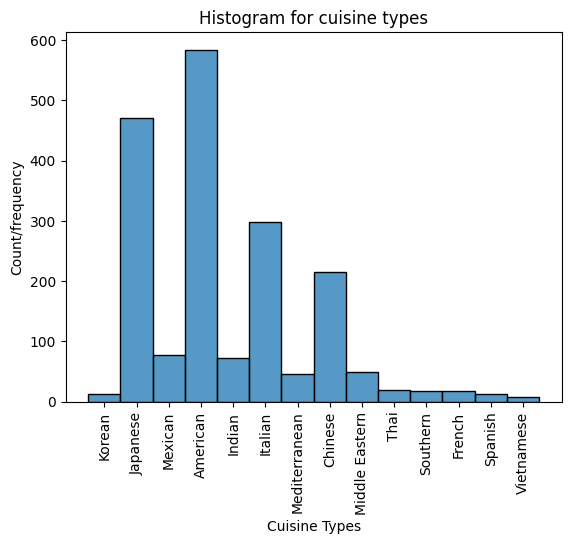

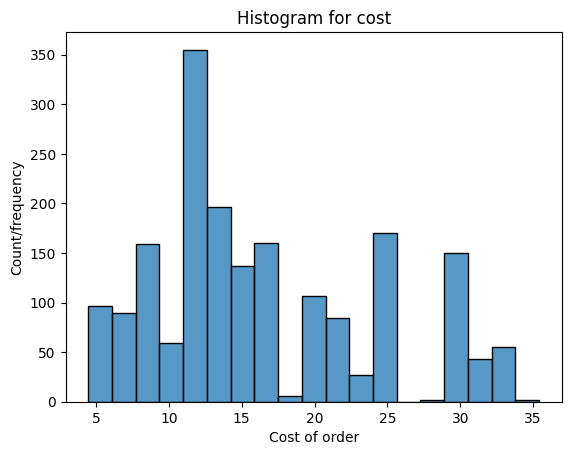

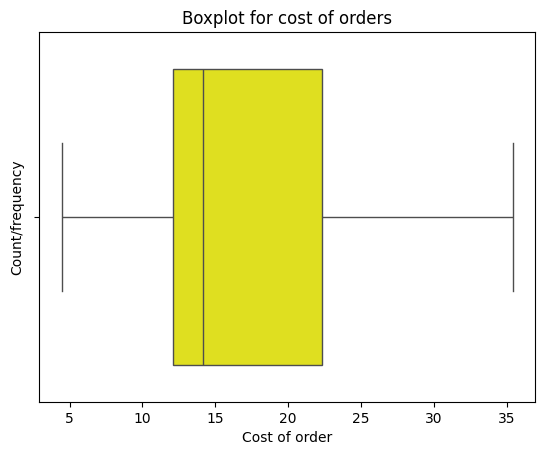

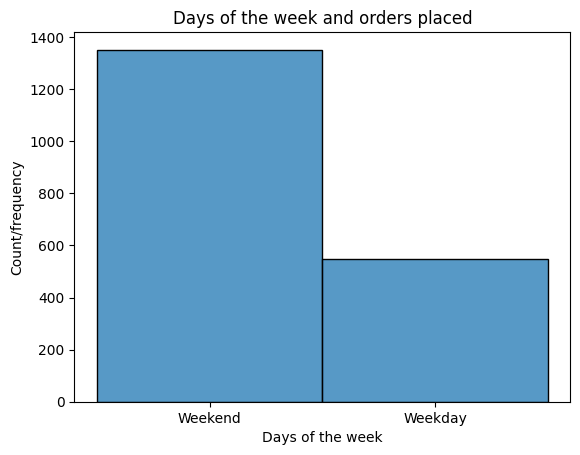

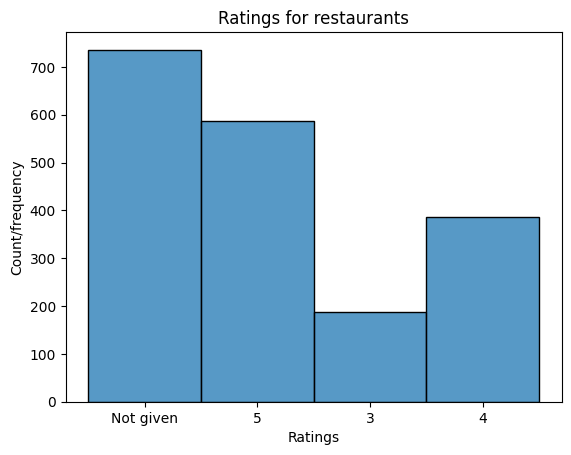

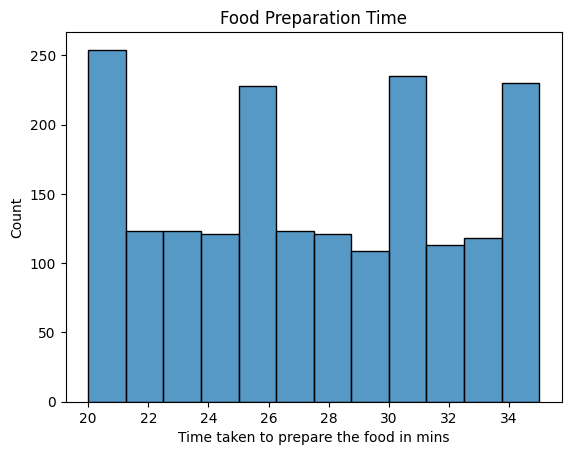

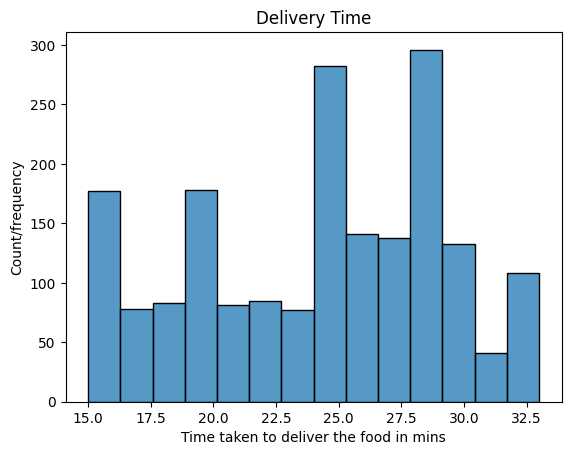

In [28]:
# Write the code here
# 1. Order Id
data['order_id'].nunique()
#returns a count of unique values in the column that are not null. There are 1898 values returned that means it has non null and unique values
#2. Customer Id
count_customerId=data['customer_id'].unique().shape[0]
print(count_customerId)
#returned 1200 count which means there are 1200 customers who have placed an order.
#3 Restaurant name
count_restaurant_name= data['restaurant_name'].unique().shape[0]
print(count_restaurant_name)
#returned 178 count which means this data set has 178 restaurants
#4. Cuisine Type
count_cuisine_type= data['cuisine_type'].value_counts().shape[0]
print(count_cuisine_type)
#returned a total of 14 different cusisine types
sns.histplot(data=data,x='cuisine_type');
plt.xticks(rotation=90)
plt.xlabel('Cuisine Types')
plt.ylabel('Count/frequency')
plt.title('Histogram for cuisine types')
plt.show()
#with histogram above, we can see that max number of orders are placed for american cuisine whereas lowest is vietnamese
#5. Cost of the order
sns.histplot(data=data,x='cost_of_the_order');
plt.xlabel('Cost of order')
plt.ylabel('Count/frequency')
plt.title('Histogram for cost')
plt.show()
# With histogram, we can see that the orders with the cost >10 and <=15 are high
# With boxplot, we can clearly see that its a right skewed dataset with Q1(25%) at somewhere 12 and Q2(median) is at 14ish, Q3(75%) is at 22.5ish
sns.boxplot(data=data,x='cost_of_the_order',color='yellow');
plt.title('Boxplot for cost of orders')
plt.xlabel('Cost of order')
plt.ylabel('Count/frequency')
plt.show()
#6. Day of the week
sns.histplot(data=data,x='day_of_the_week');
plt.xlabel('Days of the week')
plt.ylabel('Count/frequency')
plt.title('Days of the week and orders placed')
plt.show()

# with histogram, we can clearly see that max no of orders are placed on weekends.

#7. rating
sns.histplot(data=data,x='rating');
plt.xlabel('Ratings')
plt.ylabel('Count/frequency')
plt.title('Ratings for restaurants')
plt.show()
# with histogram, we can see that max no of ratings are not given and 5 is the second

#8. Food Preparation Time
sns.histplot(data=data,x='food_preparation_time');
plt.xlabel('Time taken to prepare the food in mins')
plt.ylabel('Count')
plt.title('Food Preparation Time')
plt.show()

# with histogram, we can see that food preparation time for max orders is 20 mins.

#9. Delivery Time
sns.histplot(data=data,x='delivery_time');
plt.xlabel('Time taken to deliver the food in mins')
plt.ylabel('Count/frequency')
plt.title('Delivery Time')
plt.show()
# with histogram, we can see that delivery time for max orders is between 25 to 29 mins.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [29]:
# Write the code here

top5=data['restaurant_name'].value_counts().head(5)
top5

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [30]:
# Write the code here
top_cuisine_weekend=data[data['day_of_the_week']=='Weekend']
popular_weekend=top_cuisine_weekend['cuisine_type'].value_counts().head(1)
print(popular_weekend)

cuisine_type
American    415
Name: count, dtype: int64


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [31]:
# Write the code here
total_percentage=((data['cost_of_the_order'] > 20).sum()/data.shape[0])*100
# In the code above, I am taking cost of the order thats greater than 20 and counting a total of them
# After getting the total rows thats greater than 20 order cost, dividing it by total rows in the dataset and multiplied by 100 to get percentage
print(total_percentage)

29.24130663856691


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

24.161749209694417


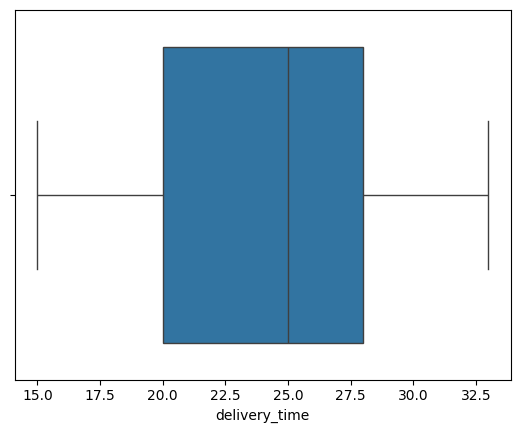

In [32]:
# Write the code here
mean_delivery_time=data['delivery_time'].mean()
#mean function is used to calculate the mean of the total delivery time and we can verify it using boxplot
print(mean_delivery_time)
sns.boxplot(data=data,x='delivery_time')
plt.show()

#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [33]:
# Write the code here
count_max_oders=data['customer_id'].value_counts().head(3)
print(count_max_oders)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


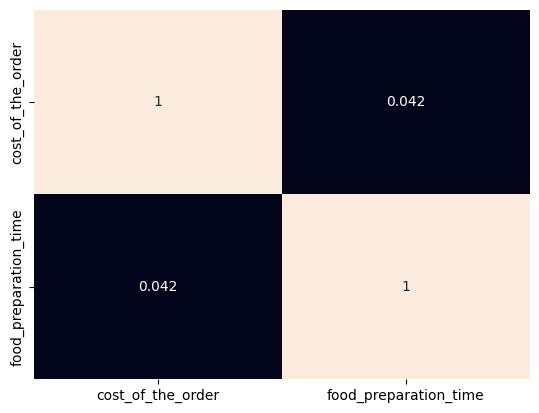

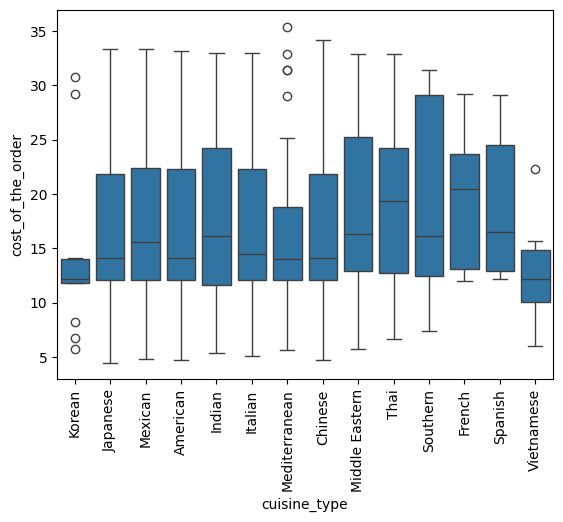

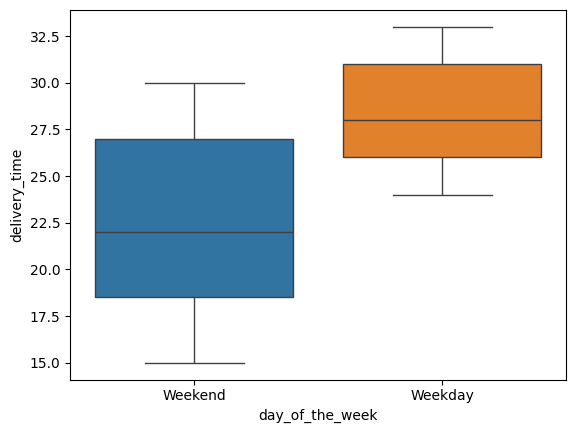

restaurant_name
'wichcraft           8.100
12 Chairs           22.675
5 Napkin Burger      9.270
67 Burger           29.050
Alidoro             12.610
                     ...  
Zero Otto Nove       9.025
brgr                 9.895
da Umberto          12.270
ilili Restaurant    16.395
indikitch           11.665
Name: cost_of_the_order, Length: 178, dtype: float64


In [34]:
# Write the code here
# relationship between cost of the order and food preparation time- Two numerical values
sns.heatmap(data=data[['cost_of_the_order','food_preparation_time']].corr(),annot=True,cbar=False);
plt.show()
# relationship between cuisine type and cost of the order and outliers- Numerical and categorical
sns.boxplot(data = data,x = "cuisine_type", y = "cost_of_the_order")
plt.xticks(rotation=90)
plt.show()
# relationship between day of the week and delivery time- Numerical and categorical
sns.boxplot(data = data,x = "day_of_the_week", y = "delivery_time",hue='day_of_the_week')
plt.show()
# best way to identify the relationship between restaurant name and price of the order is to calculate the median
average_cost_of_the_order=data.groupby(data['restaurant_name'])['cost_of_the_order'].median()
print(average_cost_of_the_order)

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [35]:
copy_onlyrated = data[data['rating'] != 'Not given'].copy()
copy_onlyrated['rating'] = copy_onlyrated['rating'].astype('int') #Converting rating column from str to int to avoid TypeError
_ratings= copy_onlyrated.groupby(copy_onlyrated['restaurant_name'])['rating'].count().reset_index()
#print(_ratings)
count_greaterfifty=_ratings[_ratings['rating']>50]['restaurant_name'] # This will give restaurant names which has ratings more than 50
#print(count_greaterfifty)
filter_rating = copy_onlyrated[copy_onlyrated['restaurant_name'].isin(count_greaterfifty)].copy()
#print(filter_rating)
average_rating = filter_rating.groupby(['restaurant_name'])['rating'].mean().reset_index()
#print(average_rating)
final_output = average_rating[average_rating['rating'] > 4]
print(final_output)


             restaurant_name    rating
0  Blue Ribbon Fried Chicken  4.328125
1          Blue Ribbon Sushi  4.219178
2                Shake Shack  4.278195
3          The Meatball Shop  4.511905


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [36]:
# Write the code here
min_order=data['cost_of_the_order'].min()
#print(min_order) # returned 4.47 dollars which means there are orders that are less than 5 and it should be as it is
def revenuecalc(text_input):
    if text_input > 20:
        return text_input*0.25
    elif text_input > 5:
        return text_input*0.15
    else:
        return text_input*0 # because we are going to sum up the values later and we dont want to calculate the values less than 5

data['revenue'] = data['cost_of_the_order'].apply(revenuecalc) ## Write the apprpriate column name to compute the revenue
#print(data)
net_revenue=data['revenue'].sum()
print(net_revenue)

6166.303


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [37]:
# Write the code here
data['combined']=data['food_preparation_time'] + data['delivery_time']
total_count=data[data['combined'] > 60].count()
calculated_amt=total_count['combined'].copy()
total_percentage_orders= (calculated_amt/data.shape[0]) * 100
print(total_percentage_orders)

10.537407797681771


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [38]:
# Write the code here
mean_weekday=data.groupby(data['day_of_the_week'])['delivery_time'].mean()
print(mean_weekday)
# As you can see below, the average delivery time on weekends is lesser than that of weekdays

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
1. There are non duplicate values in the data set and every column has got non null values.
2. There is a rating column which was a string data type because of the value "Not rated", ideally, it should have been numerical value.
3. There are a total of 1898 rows and 9 columns in the data set
4. There are outliers present in Korean, vietnamese and mediterranean cuisine type rows
5. There has been huge demand for southern cuisine types since many orders are placed for this type
6. The median price of French cuisine is the highest of all.
7. There is a customer who placed 13 orders in the data set
8. There are a total of 4 restaurants which got an average rating of more than 4.
9. It took longer time to deliver the food on weekdays over weekends
10. There is 10.5% of orders took longer than 60 mins to prepare and deliver the food.
11. The mean order to deliver the food is around 25 mins.

### Recommendations:

1. Since there has been a stronger interest in the American Cuisine Type, If the foodhub has access to the restaurants that offers american food, it would be beneficial.
2. Since there has been a lower interest in vietnamese cuisine, if the foodhub either replace them with restaurants that offer American cuisines or at least not add any other restaurants that offer Vietnamese food.
3. There are more orders that are not rated and if the app requests for feedback from customers that will greatly help the restaurants and suggestions
4. There are close to 600 restaurants that have got 5 rating out of which 4 of them have more than 50 ratings in total and average price of greater than 4. It will be better to show those restaurants as top suggestions and offer some discounts that will satisfy the greater capacity of customers.

---